In [3]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
all_files = os.listdir('.')
all_hdf5_output = [f for f in all_files if "hdf5" in f and "subspace" not in f]
print(all_hdf5_output)

['output_4.hdf5', 'output_5.hdf5', 'output_2.hdf5', 'output_3.hdf5', 'output_0.hdf5', 'output_1.hdf5', 'output_6.hdf5', 'output_7.hdf5']


In [9]:
dfs = []
for output_file in all_hdf5_output:
    f = h5py.File(output_file, "r")
    eps = f["eps"][()]
    f.close()
    df = pd.read_hdf(output_file, key="eigenvalues")
    df["eps"] = eps
    dfs.append(df)

big_df = pd.concat(dfs)

In [10]:
print(big_df.head())

   d       eps    energy  num_pos
i                                
0  3  0.000001 -2.349046        3
1  4  0.000001 -2.360079        4
2  5  0.000001 -2.362859        5
3  6  0.000001 -2.365647        5
4  7  0.000001 -2.368188        5


In [13]:
f = h5py.File("hubbard_exact.hdf5", "r")
exact_energy = f["energy"][()]
f.close()

big_df["error"] = abs(big_df["energy"] - exact_energy)

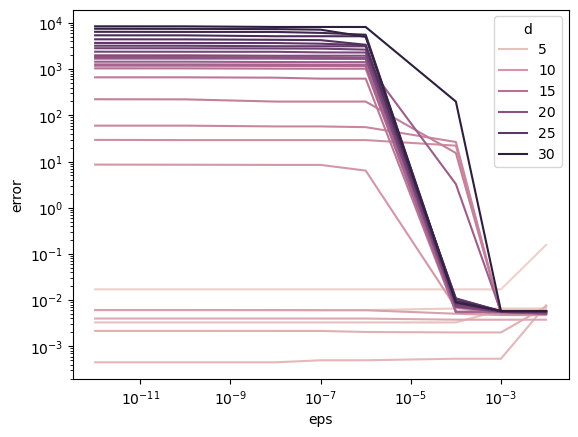

In [17]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
sns.lineplot(ax=ax, data=big_df, x="eps", y="error", hue="d")
plt.savefig("error_vs_eps.pdf")